<a href="https://colab.research.google.com/github/hussain033/ML_Projects_base/blob/main/Stock_Price_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Detection #
**using Multi linear regression**

###First Import the Packages###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

###Importing and cleaning the data###

In [2]:
url = 'https://raw.githubusercontent.com/hussain033/Datasets/main/TSLA.csv?token=GHSAT0AAAAAABZFRIPRVCRJMWLGNSUGDQUUYZZPKNA'
df = pd.read_csv(url)
df.drop(['Volume','Adj Close'],axis = 1,inplace = True)
df.head()

,Date,Open,High,Low,Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001


###Split Training and Testing Data###

In [3]:
x = df.drop(['Close','Date'],axis = 1)
y = df['Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 35)

###Training the Model###

In [4]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

###Testing the Model###

In [5]:
Y_hat = lr.predict(x_test)
Y_hat1 = pd.DataFrame(Y_hat)
y_test = y_test.reset_index(drop = True)
print(pd.concat([Y_hat1,y_test],axis = 1,ignore_index=True))


              0           1
0    202.710199  201.039993
1     20.077743   20.240000
2     32.365297   32.189999
3    173.610409  173.309998
4    326.414914  328.910004
..          ...         ...
720   29.660652   29.600000
721  235.933063  233.270004
722  262.324224  261.970001
723  223.523063  223.639999
724   34.125276   34.279999

[725 rows x 2 columns]


In [6]:
b = lr.intercept_
m = lr.coef_
print(m,b)

[-0.66024874  0.90575152  0.75276296] -0.03171650994789843


###Evaluating The Model###

In [7]:
#Calculating the R Squared
r2_val = r2_score(y_test,Y_hat)
print(r2_val)

0.9997414235477073


In [8]:
#calculating Mean Squared Error
mse = mean_squared_error(y_test,Y_hat)
print(mse)

3.748604426182056


###Visualizing the Predicted Values##

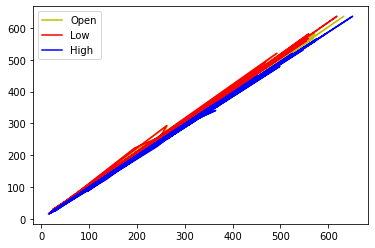

In [9]:
plt.plot(x_test['Open'],Y_hat,color='y',label = 'Open')
plt.plot(x_test['Low'],Y_hat,color='r',label = 'Low')
plt.plot(x_test['High'],Y_hat,color='b',label = 'High')
plt.legend()
plt.show()

###Testing the Model On Recent Stock Data###
2022 Tesla Stock Data

In [12]:
#Testing on new data
new = pd.read_csv('https://raw.githubusercontent.com/hussain033/Datasets/main/New_Stock_TSLA.csv')
new_x = new.drop(['Close'],axis = 1)
new_y = new['Close']
new_pred = lr.predict(new_x)
new_pred

array([237.21948228, 249.96994895, 244.46993744, 271.41872122,
       270.26210732, 283.77167361, 282.92582079, 281.28717292,
       276.11356523, 290.03468034, 306.94815438, 311.15977105,
       306.64509886, 299.75368292, 294.55429249, 304.24630671,
       298.22533818, 287.04834301, 281.69763453, 269.94924744,
       272.68456846, 271.76405005, 274.04039659, 276.43449761])

###Evaluating the model on new data###

In [14]:
#Calculating the R Squared
r2_val = r2_score(new_y,new_pred)
print(r2_val)

0.9709251656804575


In [15]:
#calculating Mean Squared Error
mse = mean_squared_error(new_y,new_pred)
print(mse)

10.221398164917884
